              Close     Adj Close      ma5   ma5_25
Date                                               
2020-05-19  50300.0  49660.433594      NaN      NaN
2020-05-20  50000.0  49364.250000      NaN      NaN
2020-05-21  49950.0  49314.882812      NaN      NaN
2020-05-22  48750.0  48130.140625      NaN      NaN
2020-05-25  48850.0  48228.871094  49570.0      NaN
...             ...           ...      ...      ...
2021-01-07  82900.0  82900.000000  82600.0  79638.0
2021-01-08  88800.0  88800.000000  84160.0  80535.0
2021-01-11  91000.0  91000.000000  85760.0  82056.0
2021-01-12  90600.0  90600.000000  87100.0  83616.0
2021-01-13  89700.0  89700.000000  88600.0  84922.5

[164 rows x 4 columns]


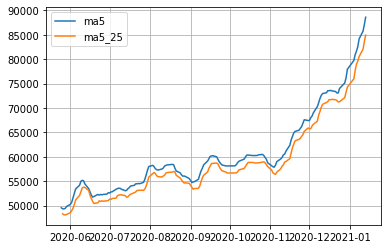

In [94]:
import pandas as p
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

start =datetime.datetime(2020,5,19)
end = datetime.datetime(2021,1,13)

samsung = web.DataReader("005930.ks","yahoo", start, end)


for i in samsung.columns:
    if i=="Volume" or i=='Open' or i=='Low' or i == 'High':
        del samsung[i]

ma5 = (samsung['Close'].rolling(5).mean())
ma10 = (samsung['Close'].rolling(10).mean())
ma20 = (samsung['Close'].rolling(20).mean())




samsung.insert(len(samsung.columns), "ma5",ma5)
# samsung.insert(len(samsung.columns), "ma10",ma10)
# samsung.insert(len(samsung.columns), "ma20",ma20)




ma5_25 = samsung.Close.rolling(5).mean()*0.975
samsung.insert(len(samsung.columns),"ma5_25", ma5_25)


samsung.ma5_25 = samsung.ma5_25.shift(1)

print(samsung)
# plt.plot(samsung.index, samsung.Close, label='Close')
plt.plot(samsung.index, samsung.ma5, label='ma5')
plt.plot(samsung.index, samsung.ma5_25, label='ma5_25')


plt.legend(loc="best")
plt.grid()
plt.show()
